# Исследование зависимости скорости сходимости от различных параметров

## Теория, постановка вопроса

Что вообще такое скорость сходимости? Во-первых, речь идёт о градиентном спуске, так что сходимости, лучше линейной говорить не приходится, но у нас всё ещё есть некий показатель в экспоненте, который может быть разным.
Теорема 3.4 утверждает, коэффициент этот — $\frac{\kappa - 1}{\kappa + 1}$, где $\kappa$ — число обусловленности второго дифференциала.

Если говорить о кумулятивной быстроте сходимости абстрактного алгоритма с практической точки зрения, имеет смысл смотреть на количество итераций до достижения фиксированного значения функции ошибки ($\varepsilon$). Далее будет показано, что, как следует из теоремы, это количество итераций линейно зависит от числа обусловленности.

## Как измеряем?

Проверим это. Понятно, что интересные эффекты есть только от второго дифференциала. Кроме того, для чистоты эксперимента будем испытывать алгоритм на эталонной системе функций, имеющих вблизи функции приспособленности второй дифференциал с фиксированным числом обусловленности, генерацию которых мы умеем контролировать, подгоняя под нужные параметры — квадратичные формы (см. функцию приспособленности).

## Независимость от выбора базиса

Покажем, что скорость сходимости не зависит от выбора базиса в генераторе: на распределении виден один чёткий пик, а отношение $\frac{\sigma}{\mu}$ весьма и весьма мало´ ($≈2%$ в данном случае — это в рамках погрешности, случайных флюктуаций).

Поэтому можно дальше исследовать поведение в случайном базисе «как одно целое» (но раз процесс ± случайный, не забываем усреднять, благо мы теперь имеем на это право).

## Характер зависимости от числа обусловленности и размерности задачи

Замерим по $s$ раз количество итераций для достижения ошибки $\varepsilon$ для каждого значения из сетки $(n, k) \in \left[2..10^3\right] × \left[1..10^3\right]$ и усредним результат по $s$ для каждой пары.

Исследуем эту зависимость:
- Если для каждого рассматриваемого $n$ построить сечение и посмотреть на зависимость $\mathrm{iterations}_n(k)$, то для каждого $n$ получится зависимость, очень близкая к линейной, почти не меняющая своих параметров при изменении $n$. Делаем гипотезу, что $T(n, k) ≈ a n + b k + c$, где $с$ не велико, а $a ≈ 0$
- Чтобы не быть голословными, построим линейную регрессию на точках, в которых считали значения $T(n, k)$.
    Как видно из результатов ниже, именно такими коэффициенты и являются, в то время как оценка качества аппроксимации $R^2$ весьма и весьма велика, так что линейная модель действительно соответствует реальности.

Давайте теперь это докажем:

## Теоретическое обоснование линейности

Из построения эксперимента,

\begin{gather}
\Delta_0 = \| f(x_0) \| ≈ 1 \\
\Delta_n = \| f(x_n) \| ≈ \varepsilon
\end{gather}

Из теоремы 3.4,

\begin{gather}
\Delta_n = r^2 \Delta_{n - 1} = \ldots = (r^2)^n \Delta_{0} \\
\Rightarrow n = \log_{r^2} \frac{1}{\varepsilon} = \frac{\log \varepsilon}{2} \frac{1}{-\log(r)} = \begin{bmatrix}r = \frac{\lambda_n - \lambda_1}{\lambda_n + \lambda_1} = \frac{\kappa - 1}{\kappa + 1} \end{bmatrix} = \frac{\log \varepsilon}{2} \frac{1}{\log(\kappa + 1) - \log(\kappa - 1)} \underset{\text{taylor}}{\propto} c \cdot \kappa
\end{gather}


[Cсылка на г-на Вольфрама Тейлора](https://www.wolframalpha.com/input?i2d=true&i=series+Divide%5B1%2Clog%5C%2840%29k%2B1%5C%2841%29-log%5C%2840%29k-1%5C%2841%29%5D+at+k+%E2%86%92%C2%A0%2B%E2%88%9E)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)
%load_ext autoreload
%autoreload 2

from core.gradient_descent import *
from core.visualizer import *
from core.optimizer_evaluator import *

## Экспериментально показываем, что количество итераций до сходимости не зависит от выбора базиса

In [3]:
generator = lambda: generate_positive_definite_quadratic_form(10, 10, random_orthonormal_basis)

computations = [iteration_count_computer(generator, gradient_descent, fibonacci_search(30))() for _ in range(100)]
computations

[46,
 52,
 47,
 51,
 51,
 50,
 46,
 51,
 50,
 52,
 52,
 51,
 52,
 50,
 50,
 50,
 52,
 51,
 51,
 50,
 50,
 47,
 44,
 46,
 50,
 49,
 38,
 48,
 52,
 52,
 46,
 42,
 51,
 51,
 51,
 51,
 51,
 50,
 50,
 50,
 50,
 44,
 48,
 44,
 48,
 50,
 48,
 50,
 52,
 51,
 50,
 50,
 50,
 52,
 44,
 52,
 50,
 49,
 50,
 52,
 52,
 50,
 50,
 44,
 48,
 50,
 53,
 46,
 52,
 51,
 48,
 50,
 44,
 51,
 51,
 51,
 48,
 51,
 52,
 51,
 52,
 50,
 46,
 50,
 48,
 52,
 51,
 52,
 50,
 52,
 50,
 53,
 51,
 50,
 51,
 49,
 51,
 52,
 52,
 50]

In [4]:
mu = np.mean(computations)
mu

49.63

In [5]:
sigma = np.std(computations)
sigma

2.6063576116872373

In [6]:
sigma / mu

0.05251576892378072

(0.0, 63.599999999999994)

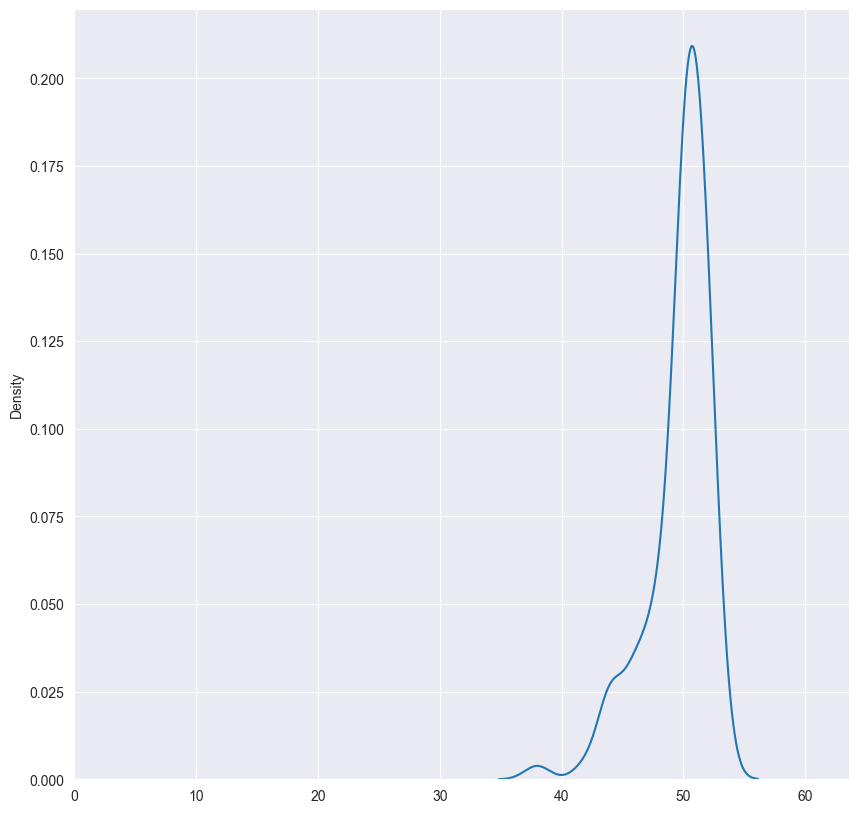

In [7]:
import seaborn as sns

fig, ax = plt.subplots()
sns.kdeplot(computations, ax=ax)
ax.set_xlim(0, max(computations) * 1.2)

## Изучаем зависимость количества итераций до *сходимости* от размерности и числа обусловленности задачи (спойлер: она, как и в теории, линейна)

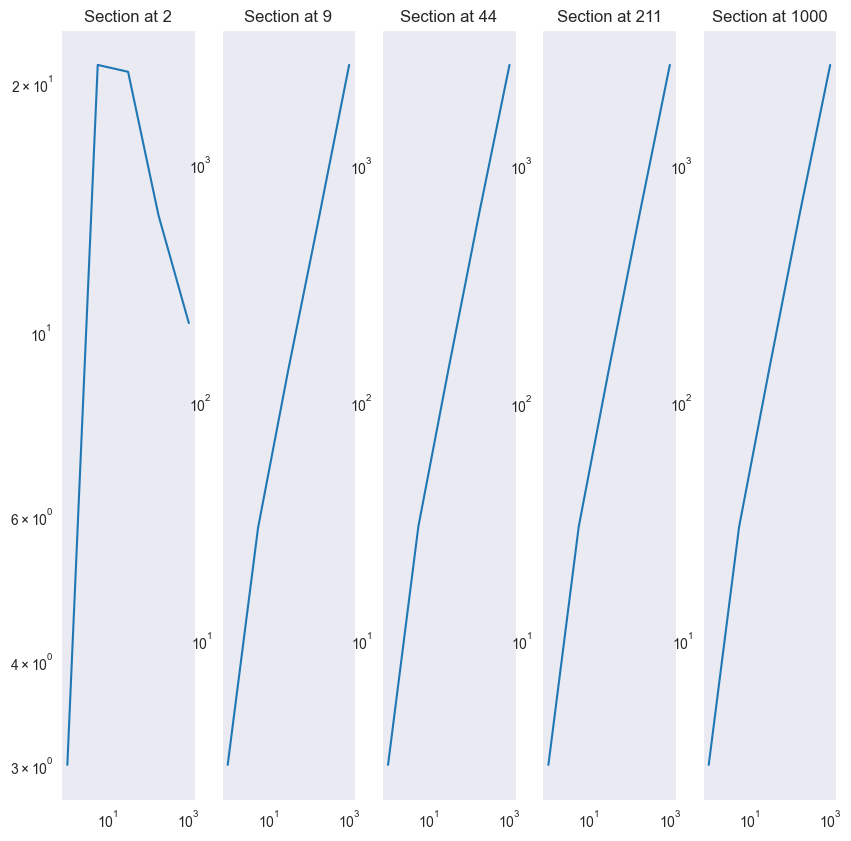

In [31]:
plot_section_graphs(lambda n, k: average_iterations_until_convergence(lambda: generate_positive_definite_quadratic_form(n, k, random_orthonormal_basis), gradient_descent, 15, fibonacci_search(40)), logspace_range(2, 1000, 5, dtype=int), logspace_range(1, 1000, 5))

### Заметим, однако, что объём вычислений растёт не линейно и даже зависит от размерности задачи: число итераций внутреннего поиска тоже требуется бОльшее с ростом числа обусловленности, а работа с векторами $n×1$ (и тем более — с матрицами $n×n$) тоже занимает растущее время. Но измеряем мы конкретный показатель — число итераций до сходимости.

Например, поиск Фибоначчи с 10-ю итерациями фейлится где-то начиная с $k \geqslant 80$ в то время, как для 30-и итераций всё работает нормально даже при $k = 1$

`RuntimeWarning: overflow encountered in matmul`

In [55]:
# iteration_count_computer(lambda: generate_positive_definite_quadratic_form(1000, 80, canonical_basis), gradient_descent, fibonacci_search(10))()

C:\dev\Education\MethOpt\GradientDescent\core\optimizer_evaluator.py:21: RuntimeWarning: overflow encountered in matmul
  return (x @ self.matrix @ x[:, newaxis])[0]
C:\dev\Education\MethOpt\GradientDescent\core\gradient_descent.py:22: RuntimeWarning: invalid value encountered in multiply
  next_point = last_point - g * linear_search(lambda l: target_function(last_point - g * l),
C:\dev\Education\MethOpt\GradientDescent\core\optimizer_evaluator.py:21: RuntimeWarning: invalid value encountered in matmul
  return (x @ self.matrix @ x[:, newaxis])[0]
C:\dev\Education\MethOpt\GradientDescent\core\optimizer_evaluator.py:24: RuntimeWarning: invalid value encountered in matmul
  return lambda x: (2 * self.matrix @ x[:, newaxis])[:, 0]
C:\dev\Education\MethOpt\GradientDescent\core\gradient_descent.py:22: RuntimeWarning: invalid value encountered in subtract
  next_point = last_point - g * linear_search(lambda l: target_function(last_point - g * l),


KeyboardInterrupt: 

Демонстрируем, что бинпоиск с остановкой по затуханию производной и поиск Фибоначчи с 30-ю итерациями отлично справляются даже для $k = 1000$

In [54]:
iteration_count_computer(lambda: generate_positive_definite_quadratic_form(1000, 500, canonical_basis), gradient_descent, fibonacci_search(30))()

602

In [56]:
iteration_count_computer(lambda: generate_positive_definite_quadratic_form(1000, 1000, canonical_basis), gradient_descent, bin_search)()

1309

In [43]:
n_values = logspace_range(10, 100, 10, dtype=int)
k_values = logspace_range(1, 150, 30)

values = [[(n, k) for k in k_values] for n in n_values]

evaluation = [[average_iterations_until_convergence(lambda: generate_positive_definite_quadratic_form(n, k, random_orthonormal_basis), gradient_descent, 15, ) for k in k_values] for n in n_values]

In [44]:
np.array(evaluation)

array([[  3.        ,   6.8       ,   8.53333333,  10.        ,
         12.06666667,  14.26666667,  16.73333333,  19.13333333,
         22.26666667,  25.86666667,  29.06666667,  35.        ,
         40.6       ,  46.8       ,  55.33333333,  64.33333333,
         75.        ,  87.46666667, 101.53333333, 119.06666667,
        138.46666667, 158.46666667, 189.66666667, 217.26666667,
        248.4       , 289.53333333, 339.93333333, 394.86666667,
        453.73333333, 537.33333333],
       [  3.        ,   7.        ,   8.46666667,  10.06666667,
         12.13333333,  14.06666667,  16.66666667,  19.2       ,
         22.46666667,  26.06666667,  30.4       ,  34.26666667,
         39.46666667,  47.13333333,  55.13333333,  65.4       ,
         75.73333333,  88.93333333, 102.        , 117.93333333,
        139.        , 160.73333333, 189.13333333, 219.6       ,
        245.4       , 288.86666667, 338.53333333, 393.33333333,
        460.33333333, 529.26666667],
       [  3.        ,   7.    

In [45]:
from sklearn.linear_model import LinearRegression

x = np.array(values).reshape(-1, 2)
y = np.array(evaluation).reshape(-1, 1)[:, 0]

In [46]:
x

array([[ 10.        ,   1.        ],
       [ 10.        ,   1.18860521],
       [ 10.        ,   1.41278235],
       [ 10.        ,   1.67924046],
       [ 10.        ,   1.99595396],
       [ 10.        ,   2.37240127],
       [ 10.        ,   2.81984851],
       [ 10.        ,   3.35168663],
       [ 10.        ,   3.98383219],
       [ 10.        ,   4.7352037 ],
       [ 10.        ,   5.62828779],
       [ 10.        ,   6.68981219],
       [ 10.        ,   7.95154563],
       [ 10.        ,   9.45124856],
       [ 10.        ,  11.23380329],
       [ 10.        ,  13.35255712],
       [ 10.        ,  15.87091896],
       [ 10.        ,  18.86425696],
       [ 10.        ,  22.42215411],
       [ 10.        ,  26.6510892 ],
       [ 10.        ,  31.67762348],
       [ 10.        ,  37.65218831],
       [ 10.        ,  44.7535872 ],
       [ 10.        ,  53.19434692],
       [ 10.        ,  63.2270779 ],
       [ 10.        ,  75.15203422],
       [ 10.        ,  89.32609942],
 

In [47]:
y

array([  3.        ,   6.8       ,   8.53333333,  10.        ,
        12.06666667,  14.26666667,  16.73333333,  19.13333333,
        22.26666667,  25.86666667,  29.06666667,  35.        ,
        40.6       ,  46.8       ,  55.33333333,  64.33333333,
        75.        ,  87.46666667, 101.53333333, 119.06666667,
       138.46666667, 158.46666667, 189.66666667, 217.26666667,
       248.4       , 289.53333333, 339.93333333, 394.86666667,
       453.73333333, 537.33333333,   3.        ,   7.        ,
         8.46666667,  10.06666667,  12.13333333,  14.06666667,
        16.66666667,  19.2       ,  22.46666667,  26.06666667,
        30.4       ,  34.26666667,  39.46666667,  47.13333333,
        55.13333333,  65.4       ,  75.73333333,  88.93333333,
       102.        , 117.93333333, 139.        , 160.73333333,
       189.13333333, 219.6       , 245.4       , 288.86666667,
       338.53333333, 393.33333333, 460.33333333, 529.26666667,
         3.        ,   7.        ,   8.6       ,  10.06

In [48]:
model = LinearRegression().fit(x, y)

In [49]:
print(f"R^2: {model.score(x, y)} ≈ 1")

R^2: 0.9961194694942691


In [50]:
model.coef_

array([0.02098247, 3.64203576])

In [51]:
model.intercept_

11.76540676227873

In [52]:
print(f"{model.coef_[0]} ≈ 0")

0.020982465577030398 ≈ 0
